In [1]:
pip install pip==21.3.1

You should consider upgrading via the 'C:\Users\dhruv\OneDrive\Desktop\face\face\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


DEPRECATION: Loading egg at c:\adwcleaner\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\AdwCleaner\Python311\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\AdwCleaner\Python311\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\AdwCleaner\Python311\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_re

In [3]:
!pip install tensorflow==2.4.1

DEPRECATION: Loading egg at c:\adwcleaner\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0)
ERROR: No matching distribution found for tensorflow==2.4.1

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
!pip install tensorflow

DEPRECATION: Loading egg at c:\adwcleaner\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [4]:
pip install tensorflow==2.13.*

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\dhruv\OneDrive\Desktop\face\face\Scripts\python.exe -m pip install --upgrade pip' command.


In [5]:
!pip install opencv-python matplotlib

DEPRECATION: Loading egg at c:\adwcleaner\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# Import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [11]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [12]:
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [13]:
# Setup paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [14]:
# Make the directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'data\\positive'

In [15]:
# http://vis-www.cs.umass.edu/lfw/

In [16]:
# Uncompress Tar GZ Labelled Faces in the Wild Dataset
!tar -xf lfw.tgz

In [17]:
# Move LFW Images to the following repository data/negative
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

In [18]:
# Import uuid library to generate unique image names
import uuid

In [19]:
os.path.join(ANC_PATH,'{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\480798cb-8ad6-11ee-b8d9-ec4d80240201.jpg'

In [20]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()

    frame = frame[120:120+250,200:200+250, :]

    #collect anchors
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file path 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)

    #collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)

# Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

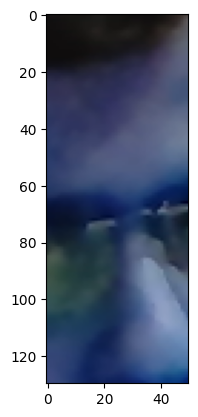

In [25]:
plt.imshow(frame[120:120+250,200:200+250, :])

In [26]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(100)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(100)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(100)

In [27]:
dir_test = anchor.as_numpy_iterator()

In [28]:
print(dir_test.next())

b'data\\anchor\\afa3a0c3-5aaa-11ee-ac03-e868eb2b8f93.jpg'


In [29]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0
    
    # Return image
    return img

In [30]:
img = preprocess('data\\anchor\\b1413c75-5aaa-11ee-a116-e868eb2b8f93.jpg')

In [31]:
img.numpy().min() 

0.0

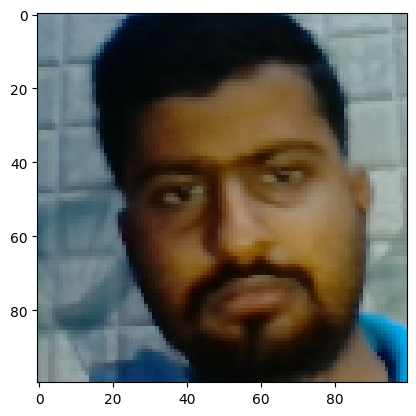

In [32]:
plt.imshow(img)

In [33]:
dataset.map(preprocess)

NameError: name 'dataset' is not defined

In [34]:
# (anchor, positive) => 1,1,1,1,1
# (anchor, negative) => 0,0,0,0,0

In [35]:
tf.ones(len(anchor))

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)>

In [60]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [77]:
data

<_ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [78]:
samples = data.as_numpy_iterator()

In [79]:
exampple = samples.next()

In [80]:
exampple

(b'data\\anchor\\a7bf7d77-614d-11ee-bc8a-c610c24ca288.jpg',
 b'data\\positive\\dce19871-5aaa-11ee-8346-e868eb2b8f93.jpg',
 1.0)

In [81]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [82]:
res = preprocess_twin(*exampple)

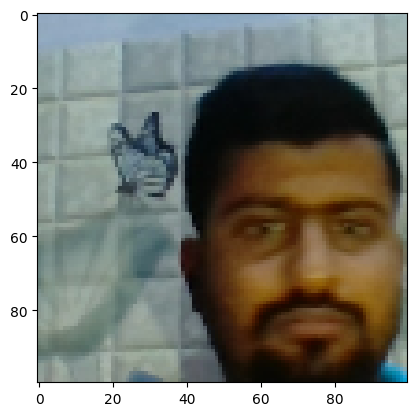

In [83]:
plt.imshow(res[1])

In [84]:
res[2]

1.0

In [85]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [86]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [87]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [88]:
inp = Input(shape=(100,100,3), name='input_image')

In [89]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [90]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [91]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [92]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [93]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [94]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [95]:
mod.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2  (None, 46, 46, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       26

In [96]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [97]:
embedding = make_embedding()

In [98]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 46, 46, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 128)       26

In [99]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [100]:
l1 = L1Dist()

In [101]:
l1(anchor_embedding, validation_embedding)

NameError: name 'anchor_embedding' is not defined

In [102]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [103]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [104]:
siamese_layer = L1Dist()

In [105]:
distances = siamese_layer(inp_embedding, val_embedding)

In [106]:
classifier = Dense(1, activation='sigmoid')(distances)

In [107]:
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>

In [108]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [109]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [110]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [111]:
siamese_model = make_siamese_model()

In [112]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [113]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [114]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

In [115]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

In [116]:
test_batch = train_data.as_numpy_iterator()

In [117]:
batch_1 = test_batch.next()

In [118]:
X = batch_1[:2]

In [119]:
y = batch_1[2]

In [120]:
y

array([1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
      dtype=float32)

In [121]:
tf.losses.BinaryCrossentropy??

Init signature:
tf.losses.BinaryCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction='auto',
    name='binary_crossentropy',
)
Source:        
@keras_export("keras.losses.BinaryCrossentropy")
class BinaryCrossentropy(LossFunctionWrapper):
    """Computes the cross-entropy loss between true labels and predicted labels.

    Use this cross-entropy loss for binary (0 or 1) classification applications.
    The loss function requires the following inputs:

    - `y_true` (true label): This is either 0 or 1.
    - `y_pred` (predicted value): This is the model's prediction, i.e, a single
      floating-point value which either represents a
      [logit](https://en.wikipedia.org/wiki/Logit), (i.e, value in [-inf, inf]
      when `from_logits=True`) or a probability (i.e, value in [0., 1.] when
      `from_logits=False`).

    **Recommended Usage:** (set `from_logits=True`)

    With `tf.keras` API:

    ```python
    model.compile(
      loss=tf.keras.losses

In [122]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
        
    # Return loss
    return loss

In [123]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [124]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object 
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [125]:
EPOCHS = 50

In [126]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
9/9 [==============================] - 244s 27s/step
0.47520503 0.21917808 0.9411765

 Epoch 2/50
9/9 [==============================] - 246s 28s/step
0.38412094 0.44927537 1.0

 Epoch 3/50
9/9 [==============================] - 240s 26s/step
0.3711239 0.7826087 0.96428573

 Epoch 4/50
9/9 [==============================] - 228s 25s/step
0.20126301 0.9076923 0.98333335

 Epoch 5/50
9/9 [==============================] - 224s 25s/step
0.06589028 0.983871 1.0

 Epoch 6/50
9/9 [==============================] - 253s 28s/step
0.036626212 0.9714286 1.0

 Epoch 7/50
9/9 [==============================] - 262s 29s/step
0.07159908 1.0 1.0

 Epoch 8/50
9/9 [==============================] - 255s 28s/step
0.0039496385 1.0 1.0

 Epoch 9/50
9/9 [==============================] - 248s 28s/step
0.060466867 1.0 1.0

 Epoch 10/50
9/9 [==

In [127]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [128]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [129]:
y_hat = siamese_model.predict([test_input, test_val])

1/1 [==============================] - 2s 2s/step


In [130]:
# Post processing the results 
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]

In [131]:
y_true

array([0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.],
      dtype=float32)

In [132]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [133]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [142]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 

print(r.result().numpy(), p.result().numpy())

1/1 [==============================] - 2s 2s/step
1.0 1.0


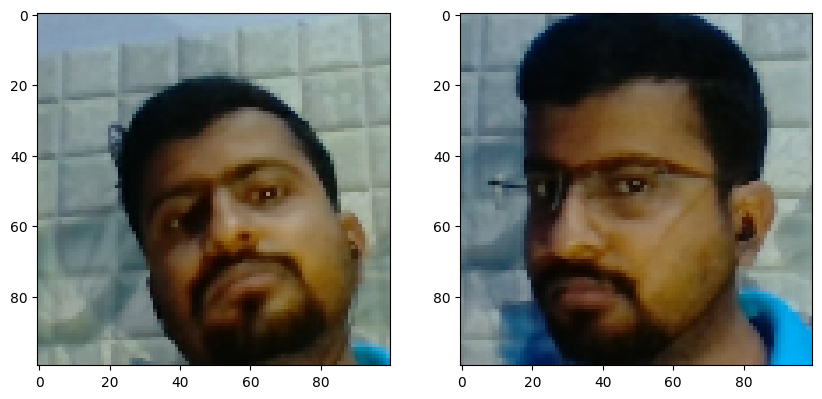

In [143]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[0])

# Renders cleanly
plt.show()

In [144]:
# Save weights
siamese_model.save('siamesemodelv2.h5')

In [145]:
L1Dist

__main__.L1Dist

In [146]:
# Reload model 
siamese_model = tf.keras.models.load_model('siamesemodelv2.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [147]:
# Make predictions with reloaded model
siamese_model.predict([test_input, test_val])

1/1 [==============================] - 2s 2s/step


array([[9.9999964e-01],
       [4.4491017e-08],
       [9.9995714e-01],
       [9.9999952e-01],
       [9.9999762e-01],
       [6.8215566e-05],
       [1.7825078e-09],
       [1.0000000e+00],
       [4.4452740e-06],
       [1.0873980e-06],
       [5.0339349e-05],
       [9.9996811e-01]], dtype=float32)

In [148]:
# View model summary
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [149]:
application_data\verification_images

SyntaxError: unexpected character after line continuation character (2818603333.py, line 1)

In [150]:
os.listdir(os.path.join('application_data', 'verification_images'))

['8e76b991-5aaa-11ee-9b72-e868eb2b8f93.jpg',
 '902f91f9-5aaa-11ee-822e-e868eb2b8f93.jpg',
 '90fd1cf4-5aaa-11ee-9e64-e868eb2b8f93.jpg',
 '919b7733-5aaa-11ee-a8b9-e868eb2b8f93.jpg',
 '91a9defb-5aaa-11ee-bf97-e868eb2b8f93.jpg',
 '927e0571-5aaa-11ee-953a-e868eb2b8f93.jpg',
 '92dc5d5f-5aaa-11ee-b6e7-e868eb2b8f93.jpg',
 '933d016e-5aaa-11ee-81ba-e868eb2b8f93.jpg',
 '9344327f-5aaa-11ee-beaf-e868eb2b8f93.jpg',
 '94ae04c4-5aaa-11ee-af74-e868eb2b8f93.jpg',
 '94d16936-5aaa-11ee-b592-e868eb2b8f93.jpg',
 'a10ae4f5-5aaa-11ee-ae34-e868eb2b8f93.jpg',
 'a230a29f-5aaa-11ee-958e-e868eb2b8f93.jpg',
 'a2978ae3-5aaa-11ee-ad67-e868eb2b8f93.jpg',
 'a2d378fa-5aaa-11ee-9977-e868eb2b8f93.jpg',
 'a62b1cff-5aaa-11ee-8c7a-e868eb2b8f93.jpg',
 'aadf1642-5aaa-11ee-a1ac-e868eb2b8f93.jpg',
 'de3e3706-5aaa-11ee-9577-e868eb2b8f93.jpg',
 'dec44aff-5aaa-11ee-ba5b-e868eb2b8f93.jpg',
 'ded396df-5aaa-11ee-a7af-e868eb2b8f93.jpg',
 'dee2a31d-5aaa-11ee-92ad-e868eb2b8f93.jpg',
 'def18d80-5aaa-11ee-987d-e868eb2b8f93.jpg',
 'df006759

In [151]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

'application_data\\input_image\\input_image.jpg'

In [152]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

application_data\verification_images\8e76b991-5aaa-11ee-9b72-e868eb2b8f93.jpg
application_data\verification_images\902f91f9-5aaa-11ee-822e-e868eb2b8f93.jpg
application_data\verification_images\90fd1cf4-5aaa-11ee-9e64-e868eb2b8f93.jpg
application_data\verification_images\919b7733-5aaa-11ee-a8b9-e868eb2b8f93.jpg
application_data\verification_images\91a9defb-5aaa-11ee-bf97-e868eb2b8f93.jpg
application_data\verification_images\927e0571-5aaa-11ee-953a-e868eb2b8f93.jpg
application_data\verification_images\92dc5d5f-5aaa-11ee-b6e7-e868eb2b8f93.jpg
application_data\verification_images\933d016e-5aaa-11ee-81ba-e868eb2b8f93.jpg
application_data\verification_images\9344327f-5aaa-11ee-beaf-e868eb2b8f93.jpg
application_data\verification_images\94ae04c4-5aaa-11ee-af74-e868eb2b8f93.jpg
application_data\verification_images\94d16936-5aaa-11ee-b592-e868eb2b8f93.jpg
application_data\verification_images\a10ae4f5-5aaa-11ee-ae34-e868eb2b8f93.jpg
application_data\verification_images\a230a29f-5aaa-11ee-958e-e86

In [153]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

In [154]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
#         hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
#         h, s, v = cv2.split(hsv)

#         lim = 255 - 10
#         v[v > lim] = 255
#         v[v <= lim] -= 10
        
#         final_hsv = cv2.merge((h, s, v))
#         img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(siamese_model, 0.5, 0.5)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 310ms/step
True


In [155]:
np.sum(np.squeeze(results) > 0.9)

26

In [156]:
results

[array([[1.]], dtype=float32),
 array([[0.00031962]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[0.9993322]], dtype=float32),
 array([[0.9856582]], dtype=float32),
 array([[0.00074172]], dtype=float32),
 array([[0.00266281]], dtype=float32),
 array([[0.9999847]], dtype=float32),
 array([[0.9999999]], dtype=float32),
 array([[0.00264962]], dtype=float32),
 array([[0.00056545]], dtype=float32),
 array([[0.00057117]], dtype=float32),
 array([[0.00437072]], dtype=float32),
 array([[0.00146448]], dtype=float32),
 array([[0.00072719]], dtype=float32),
 array([[0.0007733]], dtype=float32),
 array([[0.00062555]], dtype=float32),
 array([[0.02903647]], dtype=float32),
 array([[0.9985855]], dtype=float32),
 array([[0.99997616]], dtype=floa